In [1]:
%matplotlib inline
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Prepare data

Take a look at the dimension of the boxes first:

In [2]:
# Load data
input_dir = Path("../kuzushiji_data")
train_dir = input_dir/'train_images'

train_df = pd.read_csv(input_dir/'train.csv')
# Inspect train.csv
train_df.head(n=10)

,image_id,labels
0,100241706_00004_2,U+306F 1231 3465 133 53 U+304C 275 1652 84 69 ...
1,100241706_00005_1,U+306F 1087 2018 103 65 U+304B 1456 1832 40 73...
2,100241706_00005_2,U+306F 572 1376 125 57 U+306E 1551 2080 69 68 ...
3,100241706_00006_1,U+3082 1455 3009 65 44 U+516B 1654 1528 141 75...
4,100241706_00007_2,U+309D 1201 2949 27 33 U+309D 1196 1539 27 36 ...
5,100241706_00008_1,U+25B2 1056 929 96 39 U+309D 379 1098 21 43 U+...
6,100241706_00008_2,U+25B2 1648 955 95 44 U+25B2 1887 947 96 45 U+...
7,100241706_00009_1,U+3078 1551 2071 104 41 U+3078 323 1473 135 43...
8,100241706_00009_2,U+309D 1452 1423 20 37 U+3078 690 2535 121 41 ...
9,100241706_00010_1,U+3078 587 1127 100 40 U+3064 1103 1480 60 45 ...


In [3]:
# Extract all width, height aspect ratios of the characters
width, height, ar = [], [], []
train_df = train_df[train_df['labels'].notnull()]  # remove null labels

for rowLabel in train_df['labels']:
    allLabels = np.array(rowLabel.split(" ")).reshape(-1, 5)
    for label in allLabels:
        character, x, y, w, h = label
        x, y, w, h = int(x), int(y), int(w), int(h)
        width.append(w)
        height.append(h)
        ar.append(h/w)

In [8]:
def plot_hist_from_list(data, xlabel, ylabel, bins=50):    
    plt.hist(data, density=True, bins=bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

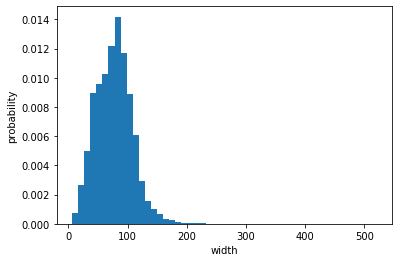

In [9]:
plot_hist_from_list(width, 'width', 'probability')

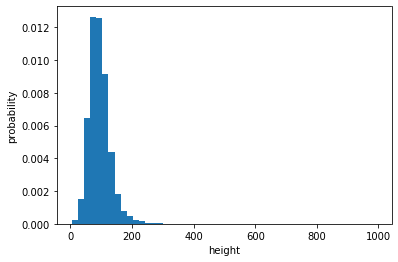

In [10]:
plot_hist_from_list(height, 'height', 'probability')

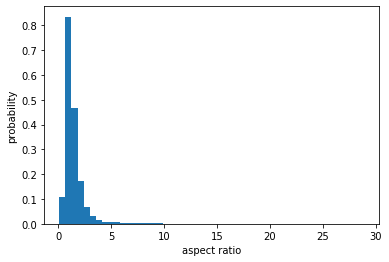

In [11]:
plot_hist_from_list(ar, 'aspect ratio', 'probability')

Extract out the characters from each image and put them together as training data, apply padding so that training images have the same size:

# Build model

# Train model